<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/notebooks/ais/40Ais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Základní statistika v Pythonu

https://docs.python.org/3/library/statistics.html

Pole dat s hodnotami float obsahující NaN (https://en.wikipedia.org/wiki/NaN) podle IEEE 754 (https://en.wikipedia.org/wiki/IEEE_754)

ZeroDivisionError: division by zero

In [ ]:
data = [20.7, float('NaN'),19.2, 18.3, float('NaN'), 14.4]
print(data)

[20.7, nan, 19.2, 18.3, nan, 14.4]


Součet s NaN vrací NaN

In [ ]:
sum(data)

nan

In [ ]:
max(data)

20.7

NameError: name 'avg' is not defined

In [ ]:
min(data)

14.4

In [ ]:
number = 0.1
number

0.1

In [ ]:
number = 0.1
while number < 0.8:
  number = number + 0.1
  print(number)

0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999


In [ ]:
(100+10e-35)-100

0.0

NaN lze z dat odstranit pomocí filtru.

In [ ]:
from math import isnan
isnotnan = lambda item: not isnan(item)
sum(filter(isnotnan, data))

72.60000000000001

Někdy data obsahují None. Pozor None není NaN.

In [ ]:
data = [20.7, None,19.2, 18.3, None, 14.4]
print(data)

[20.7, None, 19.2, 18.3, None, 14.4]


In [ ]:
sum(data)

TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [ ]:
min(data)

TypeError: '<' not supported between instances of 'NoneType' and 'float'

Hodnoty None lze odstranit obdobně jako NaN, tedy pomocí filtru.

In [ ]:
isnotnone = lambda item: item is not None
sum(filter(isnotnone, data))

72.60000000000001

Považujete-li None za 0 (za specifických okolností může mít význam), lze využít funkci map. Pozor, jestliže nepočítáte sum, ale jiné agregace, má samozřejmě vliv na výsledek.

In [ ]:
sum(map(lambda item: item if item is not None else 0, data))

72.60000000000001

Využití funkce reduce

In [ ]:
from functools import reduce

mapped = map(lambda item: item if item is not None else 0, data)
total = reduce(lambda x,y: x+y, mapped, 0)

SUM = lambda data: reduce(lambda x,y: x+y, data, 0)

print(total)

72.60000000000001


Comprehensions / map a filter

In [ ]:
filtered = (item for item in data if item is not None)
sum(filtered)

72.60000000000001

In [ ]:
mapped = (item if item is not None else 0 for item in data)
print(sum(mapped))
print(sum(mapped))

72.60000000000001
0


In [ ]:
mapped = [item if item is not None else 0 for item in data]
print(sum(mapped))
print(sum(mapped))

72.60000000000001
72.60000000000001


In [ ]:
data = [14.4, None,14.4, 14.4, None, 14.4, 14.4]
mapped = {item if item is not None else 0 for item in data}
print(sum(mapped))
print(sum(mapped))

14.4
14.4


In [ ]:
filtered = [item for item in data if item is not None]
print(sum(filtered))
print(sum(filtered))

72.60000000000001
72.60000000000001


## Modul statistic

In [ ]:
from statistics import multimode

print(multimode.__doc__)

Return a list of the most frequently occurring values.

    Will return more than one result if there are multiple modes
    or an empty list if *data* is empty.

    >>> multimode('aabbbbbbbbcc')
    ['b']
    >>> multimode('aabbbbccddddeeffffgg')
    ['b', 'd', 'f']
    >>> multimode('')
    []
    


In [ ]:
def MojeFunkce(data):
  "moje extra funkce"
  return sum(data)
print(MojeFunkce.__doc__)

moje extra funkce


In [ ]:
multimode([10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5])

[9, 8]

In [ ]:
table = [
    {"id": 1, "name": "John"},
    {"id": 3, "name": "John"},
    {"id": 2, "name": "Julia"}
]
names = multimode(map(lambda item: item["name"], table))
rows = list(filter(lambda item: item["name"] in names, table))
rows

[{'id': 1, 'name': 'John'}, {'id': 3, 'name': 'John'}]

Vytvořte transformační funkci převádející table na result

In [ ]:
table = [
    {"id": 1, "name": "John"},
    {"id": 3, "name": "John"},
    {"id": 2, "name": "Julia"}
]
result = {"John": 2, "Julia": 1}

In [ ]:
from functools import reduce

result = reduce(
    lambda accumulator, item : ({**accumulator, item["name"]: 1 + accumulator.get(item["name"], 0)}),
    table,
     {})
print(result)

{'John': 2, 'Julia': 1}


In [ ]:
mostcommon = max(result.values())
print(mostcommon)
mostcommonname = list(filter(lambda item: item[1] == mostcommon, result.items()))
print(mostcommonname)

2
[('John', 2)]


In [ ]:
from statistics import quantiles

print(quantiles.__doc__)

Divide *data* into *n* continuous intervals with equal probability.

    Returns a list of (n - 1) cut points separating the intervals.

    Set *n* to 4 for quartiles (the default).  Set *n* to 10 for deciles.
    Set *n* to 100 for percentiles which gives the 99 cuts points that
    separate *data* in to 100 equal sized groups.

    The *data* can be any iterable containing sample.
    The cut points are linearly interpolated between data points.

    If *method* is set to *inclusive*, *data* is treated as population
    data.  The minimum value is treated as the 0th percentile and the
    maximum value is treated as the 100th percentile.
    


In [ ]:
quantiles([10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5])

[5.0, 7.0, 9.0]

Konec hodiny

In [ ]:
from statistics import median_low, median_high

print(median_low.__doc__)
print(median_high.__doc__)

Return the low median of numeric data.

    When the number of data points is odd, the middle value is returned.
    When it is even, the smaller of the two middle values is returned.

    >>> median_low([1, 3, 5])
    3
    >>> median_low([1, 3, 5, 7])
    3

    
Return the high median of data.

    When the number of data points is odd, the middle value is returned.
    When it is even, the larger of the two middle values is returned.

    >>> median_high([1, 3, 5])
    3
    >>> median_high([1, 3, 5, 7])
    5

    


In [ ]:
median_low([10, 9, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5])

7

In [ ]:
median_high([10, 9, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5])

8

In [ ]:
from statistics import fmean

print(fmean.__doc__)

Convert data to floats and compute the arithmetic mean.

    This runs faster than the mean() function and it always returns a float.
    If the input dataset is empty, it raises a StatisticsError.

    >>> fmean([3.5, 4.0, 5.25])
    4.25
    


In [ ]:
fmean([10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5])

6.8

In [ ]:
from statistics import geometric_mean

print(geometric_mean.__doc__)

Convert data to floats and compute the geometric mean.

    Raises a StatisticsError if the input dataset is empty,
    if it contains a zero, or if it contains a negative value.

    No special efforts are made to achieve exact results.
    (However, this may change in the future.)

    >>> round(geometric_mean([54, 24, 36]), 9)
    36.0
    


In [ ]:
geometric_mean([10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5])

6.3315164105157695

In [2]:
from statistics import harmonic_mean

print(harmonic_mean.__doc__)

Return the harmonic mean of data.

    The harmonic mean is the reciprocal of the arithmetic mean of the
    reciprocals of the data.  It can be used for averaging ratios or
    rates, for example speeds.

    Suppose a car travels 40 km/hr for 5 km and then speeds-up to
    60 km/hr for another 5 km. What is the average speed?

        >>> harmonic_mean([40, 60])
        48.0

    Suppose a car travels 40 km/hr for 5 km, and when traffic clears,
    speeds-up to 60 km/hr for the remaining 30 km of the journey. What
    is the average speed?

        >>> harmonic_mean([40, 60], weights=[5, 30])
        56.0

    If ``data`` is empty, or any element is less than zero,
    ``harmonic_mean`` will raise ``StatisticsError``.
    


In [3]:
harmonic_mean([10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5])

5.709107385591301

In [4]:
data = [10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5]
grouped = {}
for i in data:
    grouped[i] = grouped.get(i, 0) + 1

print(grouped)
print(grouped.keys())
print(grouped.values())
print(harmonic_mean(grouped.keys(), grouped.values()))

{10: 1, 9: 3, 7: 2, 4: 2, 2: 1, 6: 2, 8: 3, 5: 1}
dict_keys([10, 9, 7, 4, 2, 6, 8, 5])
dict_values([1, 3, 2, 2, 1, 2, 3, 1])
5.709107385591301


https://cs.wikipedia.org/wiki/Sm%C4%9Brodatn%C3%A1_odchylka

$\sigma ={\sqrt {\operatorname {var} (X)}}={\sqrt {\operatorname {E} }}$

$s = \sqrt{\frac{1}{N-1} \left( \sum_{i=1}^N{x_i^2} - N{\overline{x}}^2 \right) }$


In [5]:
from statistics import stdev, variance

print(stdev.__doc__) # smerodatna odchylka
print(variance.__doc__) # rozptyl

Return the square root of the sample variance.

    See ``variance`` for arguments and other details.

    >>> stdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])
    1.0810874155219827

    
Return the sample variance of data.

    data should be an iterable of Real-valued numbers, with at least two
    values. The optional argument xbar, if given, should be the mean of
    the data. If it is missing or None, the mean is automatically calculated.

    Use this function when your data is a sample from a population. To
    calculate the variance from the entire population, see ``pvariance``.

    Examples:

    >>> data = [2.75, 1.75, 1.25, 0.25, 0.5, 1.25, 3.5]
    >>> variance(data)
    1.3720238095238095

    If you have already calculated the mean of your data, you can pass it as
    the optional second argument ``xbar`` to avoid recalculating it:

    >>> m = mean(data)
    >>> variance(data, m)
    1.3720238095238095

    This function does not check that ``xbar`` is actually the mean of
   

In [6]:
data = [10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5]
print(stdev(data))

2.274077520980446


In [7]:
data = [10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5]
print(variance(data))

5.171428571428572


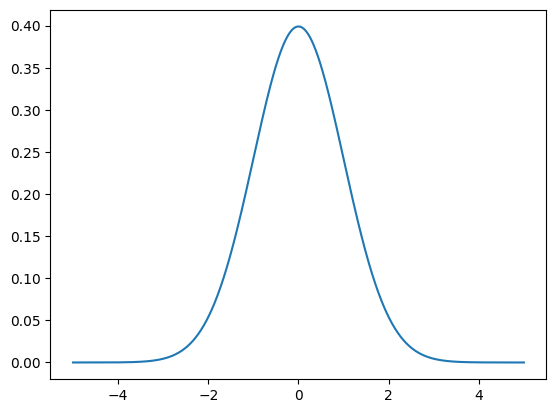

In [8]:
from matplotlib import pyplot as plt
from statistics import NormalDist

nd = NormalDist()
nd.pdf(0)
x = [i / 100 - 5 for i in range(1001)]
y = [nd.pdf(i) for i in x]
plt.plot(x, y)

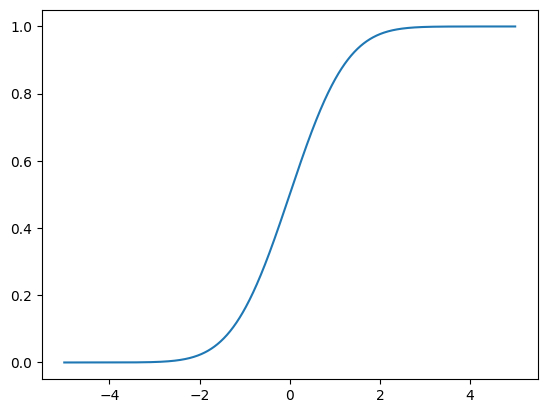

In [9]:
nd.pdf(0)
x = [i / 100 - 5 for i in range(1001)]
y = [nd.cdf(i) for i in x]
plt.plot(x, y)

In [ ]:
import IPython
IPython.version_info

(8, 8, 0, '')

### Quiz

https://kap.kr-jihomoravsky.cz/uploads/attachment/attachment/attachment_file/4230/Základy_statistiky.pdf

Vytvořte dvojice - číslo - písmeno

    1. modus
    2. relativní četnost
    3. rozsah souboru
    4. medián
    5. statistický znak
    6. aritmetický průměr
    7. statistický soubor
    8. absolutní četnost
    9. statistická jednotka

    A. součet všech hodnot znaku vydělený rozsahem souboru
    B. zvolená vlastnost statistické jednotky, kterou zkoumám
    C. prostřední hodnota statistického souboru seřazeného podle velikosti
    D. množina prvků (lidí, věcí…), na které zkoumám určitý znak
    E. poměr absolutní četnosti a rozsahu souboru
    F. jeden prvek statistického souboru
    G. nejčastější hodnota statistického souboru
    H. počet všech jednotek statistického souboru
    I. počet všech jednotek, u kterých byl zkoumaný jev zjištěn


Správné odpovědi


    1G. modus : nejčastější hodnota statistického souboru
    2E. relativní četnost : poměr absolutní četnosti a rozsahu souboru
    3H. rozsah souboru : počet všech jednotek statistického souboru
    4C. medián : prostřední hodnota statistického souboru seřazeného podle velikosti
    5B. statistický znak : zvolená vlastnost statistické jednotky, kterou zkoumám
    6A. aritmetický průměr : součet všech hodnot znaku vydělený rozsahem souboru
    7D. statistický soubor : množina prvků (lidí, věcí…), na které zkoumám určitý znak
    8I. absolutní četnost : počet všech jednotek, u kterých byl zkoumaný jev zjištěn
    9F. statistická jednotka : jeden prvek statistického souboru

### Quiz

https://kap.kr-jihomoravsky.cz/uploads/attachment/attachment/attachment_file/4230/Základy_statistiky.pdf

Při střelbě na terč získal Honza tyto body (10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5) a Jana nasbírala
tyto (9, 6, 6, 5, 10, 8, 7, 7, 2, 6, 8, 9, 3, 3, 8).

Určete tyto hodnoty:
- průměr (average/mean)
- medián (median)
- modus (modus/mode)

Stanovte lepšího střelce, zdůvodněte.

In [10]:
from statistics import median, mean, mode

Honza = [10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5]
Jana = [9, 6, 6, 5, 10, 8, 7, 7, 2, 6, 8, 9, 3, 3, 8]

In [11]:
print(mean(Honza))
print(mean(Jana))

6.8
6.466666666666667


**Řešení**

In [ ]:
from statistics import median, mean, mode

Honza = [10, 9, 7, 7, 4, 9, 2, 6, 8, 6, 9, 8, 8, 4, 5]
Jana = [9, 6, 6, 5, 10, 8, 7, 7, 2, 6, 8, 9, 3, 3, 8]

print("Honza")
print(median(Honza))
print(mean(Honza))
print(mode(Honza))

print("Jana")
print(median(Jana))
print(mean(Jana))
print(mode(Jana))

Honza
7
6.8
9
Jana
7
6.466666666666667
6


## SAT

https://nces.ed.gov/programs/digest/d17/tables/dt17_226.40.asp

https://docs.python.org/3/library/statistics.html

Výsledky SAT mají normální distribuci s průměrem 1060 a standardní odchylkou 195. Určete procento studentů s výsledky v intervalu 1100 a 1200

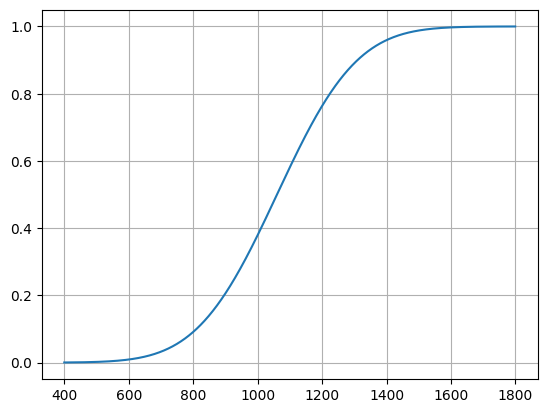

In [16]:
from statistics import NormalDist
import matplotlib.pyplot as plt

sat = NormalDist(1060, 195)

x = [i+400 for i in range(1400)]
y = [sat.cdf(i) for i in x]
plt.plot(x, y)
plt.grid()

In [19]:
from statistics import NormalDist
sat = NormalDist(1060, 195)
fraction = sat.cdf(1200 + 0.5) - sat.cdf(1100 - 0.5)
round(fraction * 100.0, 1), ' %'

(18.4, ' %')

In [20]:
sat = NormalDist(1060, 195)
fraction = sat.cdf(1200) - sat.cdf(1100)
round(fraction * 100.0, 1), ' %'

(18.2, ' %')

Kvartily

In [21]:
sat.quantiles.__doc__

'Divide into *n* continuous intervals with equal probability.\n\n        Returns a list of (n - 1) cut points separating the intervals.\n\n        Set *n* to 4 for quartiles (the default).  Set *n* to 10 for deciles.\n        Set *n* to 100 for percentiles which gives the 99 cuts points that\n        separate the normal distribution in to 100 equal sized groups.\n        '

In [ ]:
list(map(round, sat.quantiles()))

[928, 1060, 1192]

In [22]:
list(map(round, sat.quantiles(5)))

[896, 1011, 1109, 1224]

Decily

In [ ]:
list(map(round, sat.quantiles(n=10)))

[810, 896, 958, 1011, 1060, 1109, 1162, 1224, 1310]

### Quiz

https://docs.python.org/3/library/statistics.html

Konference o programování má 750 přihlášených osob. Je k dispozici hala s kapacitou 500 míst. V předchozích konferencích 65% přihlášených preferovalo programovací jazyk Python před programovacím jazykem Ruby. Jaká je pravděpodobnost, že hala bude stačit zájmu o přednášku o nové verzi Pythonu konající se v této hale?

In [23]:
n = 750             # Počet přihlášených
p = 0.65            # Preference for Python
q = 1.0 - p         # Preference for Ruby
k = 500             # Kapacita haly

Simulace

Vytvořte funkci která vrací náhodné rozdělení účastníků konference.

In [24]:
import random

def PeoplePreferences(p=p, q=q, n=n):
    return random.choices(('Python', 'Ruby'), (p, q), k=n)

PeoplePreferences(n=15)

['Python',
 'Python',
 'Ruby',
 'Python',
 'Python',
 'Ruby',
 'Ruby',
 'Python',
 'Ruby',
 'Python',
 'Ruby',
 'Python',
 'Python',
 'Python',
 'Python']

Spočtěte "pythonisty"

In [25]:
def pythonists(all):
    return all.count('Python')

pythonists(PeoplePreferences())

488

Simulujte opakovaně a sledujte, kdy se "vejdou"

In [30]:
from statistics import mean

# random.seed(8675309)

def MonteCarloSim():
    return pythonists(PeoplePreferences())

mean(MonteCarloSim() <= k for i in range(10_000))

0.8435

A teď matematický výpočet

In [31]:
# Approximation using the cumulative normal distribution
from math import sqrt
model = NormalDist(mu=n*p, sigma=sqrt(n*p*q))
round(model.cdf(k + 0.5), 4)

0.8402

## Klasifikátor

Máme vstupní data o fyziologických atributech (výška, váha, velikost nohy). Cílem je rozhodnout podle naměřených atributů o pohlaví osoby.

In [32]:
height_male = NormalDist.from_samples([6, 5.92, 5.58, 5.92])
height_female = NormalDist.from_samples([5, 5.5, 5.42, 5.75])
weight_male = NormalDist.from_samples([180, 190, 170, 165])
weight_female = NormalDist.from_samples([100, 150, 130, 150])
foot_size_male = NormalDist.from_samples([12, 11, 12, 10])
foot_size_female = NormalDist.from_samples([6, 8, 7, 9])

In [33]:
def simdata(nd, count=10000):
    x = nd.samples(count)
    x.sort()
    y = [nd.pdf(i) for i in x]
    return x, y

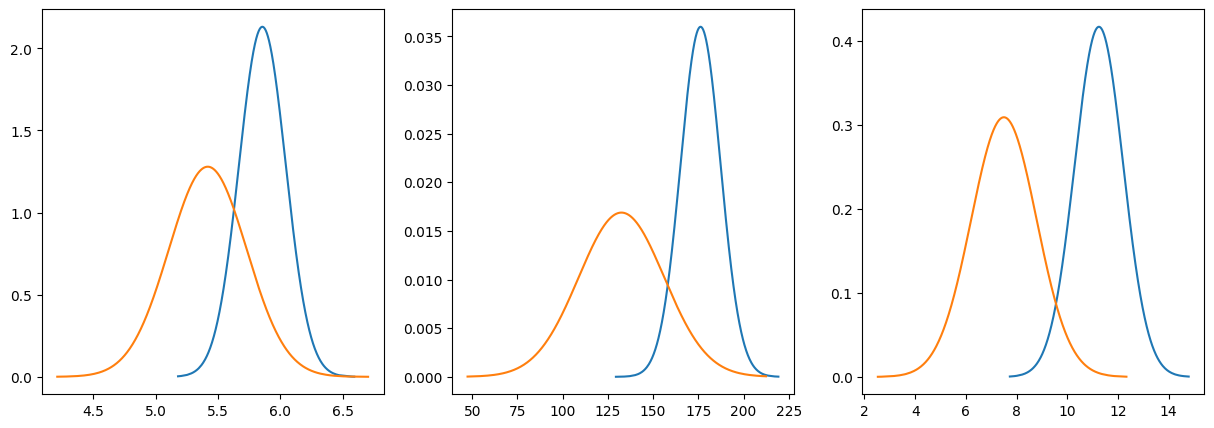

In [34]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

height_male = NormalDist.from_samples([6, 5.92, 5.58, 5.92])
height_female = NormalDist.from_samples([5, 5.5, 5.42, 5.75])
weight_male = NormalDist.from_samples([180, 190, 170, 165])
weight_female = NormalDist.from_samples([100, 150, 130, 150])
foot_size_male = NormalDist.from_samples([12, 11, 12, 10])
foot_size_female = NormalDist.from_samples([6, 8, 7, 9])

mhx, mhy = simdata(height_male)
mwx, mwy = simdata(weight_male)
mfx, mfy = simdata(foot_size_male)

fhx, fhy = simdata(height_female)
fwx, fwy = simdata(weight_female)
ffx, ffy = simdata(foot_size_female)

ax1.plot(mhx, mhy, fhx, fhy)
ax2.plot(mwx, mwy, fwx, fwy)
ax3.plot(mfx, mfy, ffx, ffy)

In [36]:
ht = 6.0        # height
wt = 130        # weight
fs = 8          # foot size

In [37]:
print("male", height_male.pdf(ht))
print("female", height_female.pdf(ht))

male 1.5788831832641037
female 0.22345872684481594


In [38]:
print("male", weight_male.pdf(wt))
print("female", weight_female.pdf(wt))

male 5.986743024812152e-06
female 0.01678929788990836


In [39]:
print("male", foot_size_male.pdf(fs))
print("female", foot_size_female.pdf(fs))

male 0.0013112210442223463
female 0.2866906998910189


In [40]:
male = (height_male.pdf(ht) * weight_male.pdf(wt) * foot_size_male.pdf(fs))
female = (height_female.pdf(ht) * weight_female.pdf(wt) * foot_size_female.pdf(fs))
print("male", male)
print("female", female)


male 1.2394143687756186e-08
female 0.0010755818367260042


In [41]:
'male' if male > female else 'female'

'female'